<a href="https://colab.research.google.com/github/ameliafatmasari/machine-learning-models/blob/main/Modeling%20Heart%20Disease%20Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amelia Fatmasari





#Business Understanding
Penyakit jantung adalah penyebab utama kematian di seluruh dunia. Deteksi dini dan intervensi yang tepat dapat secara signifikan meningkatkan hasil kesehatan pasien dan mengurangi beban finansial pada sistem kesehatan. Menggunakan model pembelajaran mesin untuk memprediksi risiko penyakit jantung dapat membantu dokter membuat keputusan yang lebih cepat dan akurat.

Tujuan utama dari proyek ini adalah untuk mengembangkan model prediksi yang dapat diandalkan dan akurat untuk mendeteksi risiko penyakit jantung pada pasien. Dengan model yang tepat, diharapkan penyedia layanan kesehatan dapat:

1. Mengidentifikasi pasien berisiko tinggi lebih awal.
2. Memberikan intervensi yang tepat waktu dan tepat sasaran.
3. Mengoptimalkan penggunaan sumber daya medis.
4. Mengurangi biaya perawatan kesehatan secara keseluruhan dengan mencegah komplikasi yang lebih serius.

#Problem Statement
Bagaimana kita dapat mengembangkan dan mengimplementasikan model pembelajaran mesin yang dapat diandalkan dan tidak rentan terhadap overfitting untuk memprediksi risiko penyakit jantung pada pasien, guna meningkatkan deteksi dini dan pengambilan keputusan klinis?

##Masalah Khusus yang Perlu Diatasi:
1. Memilih Model yang Tepat: Menentukan model pembelajaran mesin yang memberikan kinerja optimal dengan risiko minimal terhadap overfitting atau underfitting.
2. Akurasi dan Keandalan: Menggunakan model dengan akurasi tinggi yang dapat diandalkan untuk prediksi risiko penyakit jantung.
3. Implementasi Klinis: Memastikan model yang dipilih dapat diimplementasikan secara efektif di lingkungan klinis, dengan meminimalkan kebutuhan untuk hyperparameter tuning yang rumit.
4. Pemantauan dan Peningkatan Berkelanjutan: Mengembangkan strategi untuk pemantauan dan peningkatan model secara berkelanjutan untuk memastikan tetap relevan dan akurat dengan data terbaru.

#Import

In [ ]:
#import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
#hubungkan google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Data Preparation

##Data Loading

In [ ]:
#membaca data heart disease di google drive
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')

In [ ]:
#menampilkan 5 data teratas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#menampilkan 5 data terbawah
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#melihat jumlah baris dan kolom
df.shape

(1025, 14)

Terlihat bahwa terdapat 1025 baris dan 14 kolom pada data heart disease ini.

In [ ]:
#melihat nama-nama kolom tersebut
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Dari sumber berikut "https://archive.ics.uci.edu/dataset/45/heart+disease", dapat diketahui penjelasan masing-masing kolom yaitu sebagai berikut:
1. age: usia pasien pada tahun ini
2. sex: jenis kelamin (1 = laki-laki, 0 = perempuan)
3. cp: jenis nyeri dada yang nilainya berkisar dari 0 hingga 3
    *   0 : angina khas
    *   1 : angina atipikal
    *   2 : nyeri non-angina
    *   3 : asimtomatik
4. trestbps: tekanan darah istirahat (dalam mmHg)
5. chol (serum cholestoral): serum kolestoral dalam mg/dl
6. fbs: kadar gula darah puasa pasien yang diukur. jika nilainya lebih dari 120 mg/dl ditandai dengan 1, jika tidak, ditandai dengan 0
7. restecg: hasil elektrokardiografi istirahat pasien dengan nilai berkisar dari 0 hingga 2
  *   0 : normal
  *   1 : memiliki kelainan gelombang ST-T (inversi gelombang T dan / atau elevasi ST atau depresi > 0,05 mV)
  *   2 : menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti menurut kriteria Estes
8. thalach: denyut jantung maksimum yang dicapai oleh pasien
9. exang: angina akibat olahraga (1 = ya; 0 = tidak)
10. oldpeak: depresi segmen ST yang disebabkan oleh olahraga relatif terhadap istirahat
11. slope: bentuk kemiringan segmen ST selama latihan puncak dengan nilai berkisar dari 0-2
  *   0 : miring ke atas
  *   1 : datar
  *   2 : miring ke bawah
12. ca: jumlah pembuluh darah utama (0-3) yang terlihat berwarna pada hasil fluoroskopi
13. thal: jenis thalasemmia pasien. 1 = normal, 2 = cacat tetap, 3 = cacat reversibel
14. target: target apakah ada kehadiran penyakit jantung pada pasien. 0 = tidak ada, 1 = ada




In [ ]:
#melihat jumlah kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Terlihat bahwa jumlah kolom ada 14 dan tipe datanya semua integer kecuali oldpeak. Oldpeak bertipe data float.

##Pemeriksaan Missing Value

In [ ]:
#memeriksa missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Terlihat bahwa tidak ada kolom yang mengandung null sehingga tidak ada missing value pada data ini.

##Pemeriksaan dan Penanganan Anomali

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Jika kita periksa satu-satu menggunakan code df['(nama kolom)'].unique() akan terlihat bahwa kolom 'ca' dan 'thal' terdapat data anomali. Jika dilihat dari penjelasan kolom pada bagian awal, kolom 'ca' terdiri dari 4 values (0-3) dan kolom 'thal' terdiri dari 3 values (1-3). Sedangkan dari output di atas terlihat kolom 'ca' terdiri dari 5 values dan kolom 'thal' terdiri dari 4 values sehingga masing-masing kolom tersebut terdapat 1 data anomali.

In [ ]:
#menghitung jumlah masing-masing value pada kolom 'ca'
df['ca'].value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Terdapat 18 baris data yang memiliki value 4 di mana value 4 ini juga merupakan value yang memiliki baris paling sedikit sehingga value 4 akan dianggap sebagai missing value.

In [ ]:
#melihat baris yang memiliki kolom 'ca' dengan nilai 4
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
#mengganti kolom 'ca' yang bernilai 4 menjadi NaN
df.loc[df['ca']==4,'ca']=np.NaN

In [ ]:
#memeriksa apakah masih ada kolom 'ca' yang bernilai 4
df['ca'].value_counts()

ca
0.0    578
1.0    226
2.0    134
3.0     69
Name: count, dtype: int64

Terlihat bahwa kolom 'ca' dengan nilai 4 yang terdiri dari 18 baris telah berhasil dihilangkan.

In [ ]:
#menghitung jumlah masing-masing value pada kolom 'thal'
df['thal'].value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

Terdapat 7 baris data yang memiliki value 0 di mana value 0 ini juga merupakan value yang memiliki baris paling sedikit sehingga value 0 akan dianggap sebagai missing value.

In [ ]:
#melihat baris yang memiliki kolom 'thal' dengan nilai 0
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
329,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
734,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
893,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [ ]:
#mengganti kolom 'thal' yang bernilai 0 menjadi NaN
df.loc[df['thal']==0,'thal']=np.NaN

In [ ]:
#memeriksa apakah masih ada kolom 'thal' yang bernilai 0
df['thal'].value_counts()

thal
2.0    544
3.0    410
1.0     64
Name: count, dtype: int64

Terlihat bahwa kolom 'thal' dengan nilai 0 yang terdiri dari 7 baris telah berhasil dihilangkan.

In [ ]:
#melakukan pemeriksaan kembali apakah terdapat missing value
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

Terdapat missing value di kolom 'ca' dan kolom 'thal'. Hal ini dikarenakan data anomali pada kolom tersebut telah dihilangkan.

In [ ]:
#mengganti missing value pada kolom 'ca' dan 'thal' dengan nilai modusnya
mode_ca = df['ca'].mode()[0]
df['ca'] = df['ca'].fillna(mode_ca)

mode_thal = df['thal'].mode()[0]
df['thal'] = df['thal'].fillna(mode_thal)


In [ ]:
#melakukan pemeriksaan kembali apakah masih terdapat missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Terlihat bahwa sudah tidak ada missing value pada data heart disease ini.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 112.2 KB


Terlihat pula bahwa kolom 'ca' dan 'thal' berubah menjadi bertipe data float yang sebelumnya di awal kedua kolom tersebut bertipe data integer.

In [ ]:
#mengubah kolom 'ca' dan 'thal' menjadi tipe data integer kembali
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)

In [ ]:
#memeriksa apakah kolom 'ca' dan 'thal' masih bertipe data float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Terlihat bahwa kolom ca dan thal sudah kembali seperti awal yaitu bertipe data integer.

##Pemeriksaan dan Penanganan Duplicate

In [ ]:
#memeriksa apakah terdapat data yang duplikat
df.duplicated().sum()

723

Terdapat 723 data yang duplikat yang harus dihapus.

In [ ]:
#menghapus data duplikat tersebut
df = df.drop_duplicates()

In [ ]:
#memeriksa kembali apakah masih terdapat data yang duplikat
df.duplicated().sum()

0

Terlihat sudah tidak ada data yang duplikat.

##Pemeriksaan Outlier

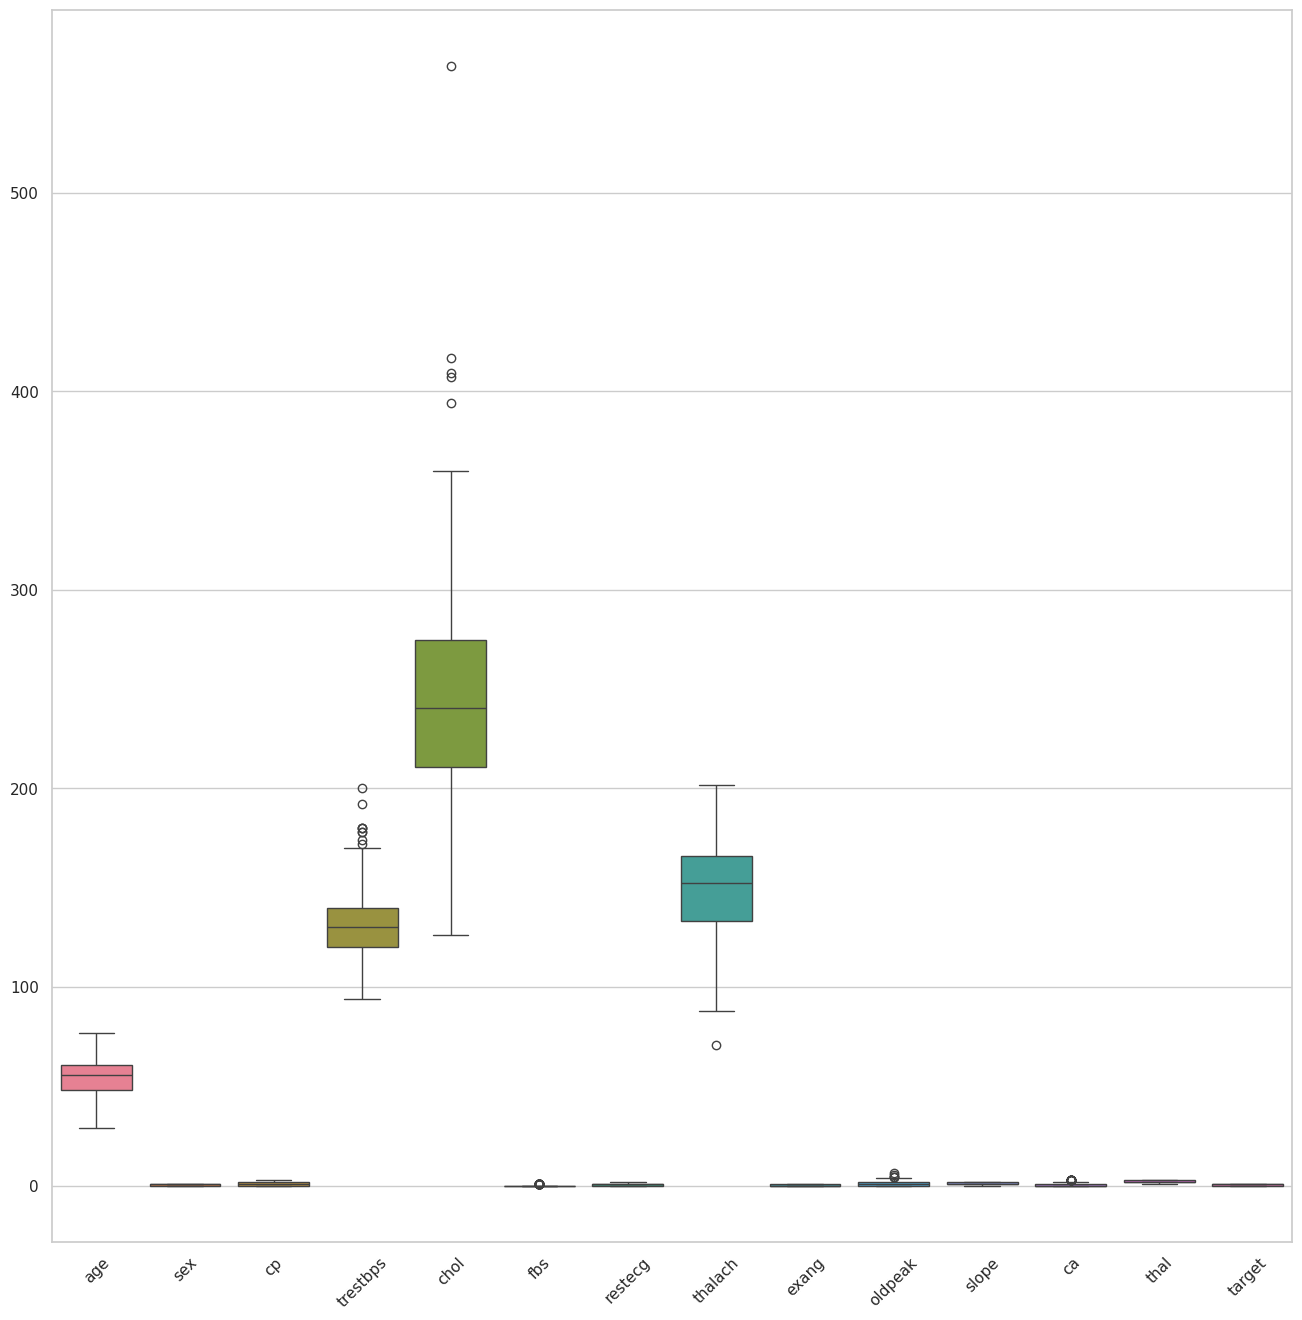

In [ ]:
#membuat box plot dari data sehingga terlihat apakah terdapat outlier pada data
sns.set(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(16,16))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

Terlihat terdapat outlier pada kolom 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', dan 'ca'. Tetapi outlier tersebut tidak akan ditangani sebab masih masuk akal nilai-nilainya dan heart disease ini juga merupakan data medis yang tidak bisa asal ditangani.

##Pemeriksaan Imbalance Data

In [ ]:
#memeriksa imbalance data
df.value_counts('target')

target
1    164
0    138
Name: count, dtype: int64

Terlihat tidak terlalu jauh berbeda antara value 0 dan 1. Atau dengan kata lain, tidak terlalu jauh berbeda pasien yang berpenyakit jantung (value 1) dengan pasien yang tidak berpenyakit jantung (value 0), selisihnya hanya 26 nilai atau sekitar 8% saja sehingga tidak perlu ditangani.

##Feature Encoding
Tidak ada feature encoding pada kasus ini dikarenakan tipe data pada semua kolom di kasus ini sudah numerik, tidak ada yang kategorikal.

#Exploratory Data Analysis (EDA)


##Features dan Tipe Data (Nominal, Ordinal, Numerical)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Data nominal adalah jenis data yang digunakan untuk menunjukkan kategori atau label tanpa memiliki urutan tertentu di antara nilai-nilai tersebut. Pada data heart disease ini, kolom-kolom atau variabel yang termasuk data nominal adalah:

1. sex: Variabel ini memiliki dua kategori, yaitu "female" (perempuan) dengan nilai 0 dan "male" (laki-laki) dengan nilai 1. Ini adalah tipe data nominal karena tidak ada urutan yang berarti antara perempuan dan laki-laki, keduanya hanya merepresentasikan kategori berbeda.

2. fbs: Variabel ini memiliki dua kategori, yaitu "tidak" (nilai 0) dan "ya" (nilai 1). Ini juga tipe data nominal karena hanya menggambarkan apakah kadar gula darah saat puasa melebihi 120 atau tidak. Tidak ada urutan yang berarti antara "tidak" dan "ya', hanya dua kategori yang berbeda.

3. exang: Variabel ini juga memiliki dua kategori, yaitu "tidak" (nilai 0) dan "ya" (nilai 1). Sama seperti fbs, ini adalah tipe data nominal karena hanya menggambarkan apakah angina (nyeri dada) dipicu oleh aktivitas fisik atau tidak. Tidak ada urutan yang berarti antara "tidak" dan "ya', hanya dua kategori yang berbeda.

4. target: Variabel ini juga memiliki dua kategori, yaitu "tidak terdiagnosa penyakit jantung" (nilai 0) dan "terdiagnosa penyakit jantung" (nilai 1). Ini adalah tipe data nominal karena hanya menggambarkan apakah pasien terdiagnosa penyakit jantung atau tidak. Tidak ada urutan yang berarti antara "tidak" dan "ya', hanya dua kategori yang berbeda.

5. cp: Variabel ini juga merupakan tipe data nominal karena jenis sakit dada yang diwakili oleh setiap kategori tidak memiliki urutan yang menggambarkan tingkat keparahan. Label seperti "Typical Angina, Atypical Angina, dll", hanya mengkategorikan jenis nyeri dada berdasarkan perbedaan gejala-gejala yang dirasakan pasien atau faktor lainnya.

6. restecg: Variabel ini juga bertipe data nominal karena ketiga kategori pada restecg hanya melabelkan kondisi kesehatan pasien tanpa adanya urutan atau tingkatan keparahan tertentu. Kelas 0, 1, dan 2 mewakili kondisi yang berbeda tanpa adanya hubungan urutan antara satu kondisi dengan yang lain.

7. slope: Variabel ini juga bertipe data nominal karena ketiga kategori dalam slope adalah tipe-tipe bentuk kemiringan segmen ST yang berbeda selama aktivitas fisik pasien maksimal. Tidak ada urutan yang berarti pada ketiga kategori slope.

Data ordinal adalah jenis data yang menggambarkan variabel dengan tingkatan atau tingkat yang memiliki urutan atau hierarki tertentu. Pada data heart disease ini, kolom atau variabel yang termasuk data ordinal adalah:
1. thal: masing-masing variabel thal berisi data dengan tingkat keparahan kondisi kesehatan pasien, mulai dari kondisi kesehatan pasien yang normal hingga kondisi gejala sakit yang parah.

Data numerik adalah jenis data yang terdiri dari nilai-nilai numerik atau angka. Pada data heart disease ini, kolom atau variabel yang termasuk data numerik adalah:
1. age: Variabel ini berisi usia pasien dalam tahun. Usia adalah bilangan bulat yang dapat diukur secara kuantitatif.
2. trestbps: Variabel ini berisi data tentang tekanan darah pasien pada saat istirahat dan diukur dalam mmHg (milimeter raksa). Ini adalah bilangan bulat yang menggambarkan tekanan darah secara kuantitatif.
3. chol: Variabel ini mengukur kadar kolesterol pasien dalam mg/dl (miligram per desiliter). Kadar kolesterol adalah bilangan bulat yang menggambarkan jumlah kolesterol dalam darah secara kuantitatif.
4. thalach: Variabel ini mengukur detak jantung maksimum yang dapat dicapai oleh pasien selama tes olahraga dan diukur dalam bpm (denyut per menit). Ini adalah bilangan bulat yang menggambarkan detak jantung secara kuantitatif.
5. oldpeak: Variabel ini mengukur tingkat depresi relatif terhadap istirahat yang dipicu oleh olahraga, nilai data ini bersifat float yang menggambarkan perubahan dalam elektrokardiogram secara kuantitatif.
6. ca: Variabel ini mengukur jumlah vessel utama yang diwarnai oleh flourosopy. Ini adalah bilangan bulat yang menggambarkan jumlah secara kuantitatif.



##Mean, Median, dan Modus

In [ ]:
#memeriksa mean, median, dan modus
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Terlihat mean dan median pada masing-masing kolom. Sebagai contoh, kolom sex, meannya adalah 0.682119, mediannya adalah 1.000000. Untuk modus, karena data heart disease ini semuanya bertipe data numerik, maka modusnya tidak dapat terlihat dari df.describe() tersebut. Jika datanya ada yang bertipe data objek, di output di atas akan muncul baris top dan freq, di mana itu memberitahu mengenai modusnya.

##Statistical Five Summaries


In [ ]:
five_summaries = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
five_summaries

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
min,29.0,0.0,0.0,94.0,126.00,0.0,0.0,71.00,0.0,0.0,0.0,0.0,1.0,0.0
25%,48.0,0.0,0.0,120.0,211.00,0.0,0.0,133.25,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.5,1.0,1.0,130.0,240.50,0.0,1.0,152.50,0.0,0.8,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.75,0.0,1.0,166.00,1.0,1.6,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.00,1.0,2.0,202.00,1.0,6.2,2.0,3.0,3.0,1.0


Statistical five summaries adalah rangkuman statistik yang terdiri dari minimum, q1, q2, q3, dan maksimum. Terlihat minimum, q1, q2, q3, dan maksimum dari masing-masing kolom di atas. Sebagai contoh, kolom age, minimumnya adalah 29 tahun, maksimumnya adalah 77 tahun, q1 nya (25%) adalah 48 tahun, q2 nya (50%) adalah 55.5 tahun, dan q3 nya (75%) adalah 61 tahun.

##Distribusi Data

<Axes: xlabel='age', ylabel='Density'>

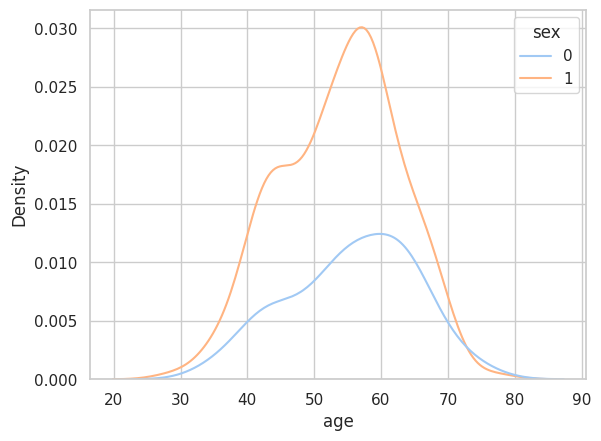

In [ ]:
#menampilkan distribusi dari kolom 'age' dan 'sex'
sns.kdeplot(data=df, x="age", hue="sex")

Kedua kurva di atas terlihat tidak simetris (negative skew). Hal ini berarti nilai mediannya lebih besar dibandingkan dengan nilai meannya. 1 (laki-laki) kurvanya cukup lancip menggambarkan variansinya cukup kecil. Sedangkan 0 (perempuan) lebih landai menggambarkan variansinya lebih besar. Dari kurva tersebut juga terlihat, laki-laki dengan usia 55 - 60 merupakan usia terbanyak pada data ini. Sedangkan yang perempuan, usia 55 - 65 merupakan usia terbanyak pada data ini. Tidak hanya itu, dari kurva juga terlihat bahwa data heart disease didominasi oleh laki-laki karena kurva laki-laki jauh lebih tinggi dibandingkan kurva perempuan.

<Axes: xlabel='age', ylabel='Density'>

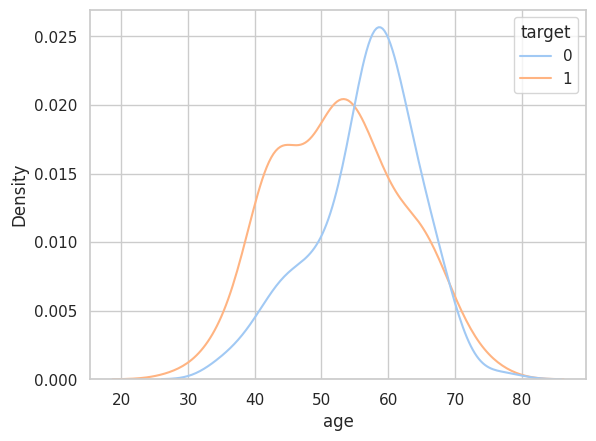

In [ ]:
#menampilkan distribusi dari kolom 'age' dan 'target'
sns.kdeplot(data=df, x="age", hue="target")

Kedua kurva di atas terlihat tidak simetris (negative skew). Hal ini berarti nilai mediannya lebih besar dibandingkan dengan nilai meannya. 0 (no diseases) kurvanya cukup lancip menggambarkan variansinya cukup kecil. Sedangkan 1 (diseases) lebih landai menggambarkan variansinya lebih besar. Dari kurva tersebut juga terlihat, usia 50-55 merupakan usia terbanyak yang terkena penyakit jantung. Sedangkan usia 57-60 merupakan usia terbanyak yang tidak terkena penyakit jantung pada kasus ini.

<Axes: xlabel='sex', ylabel='Density'>

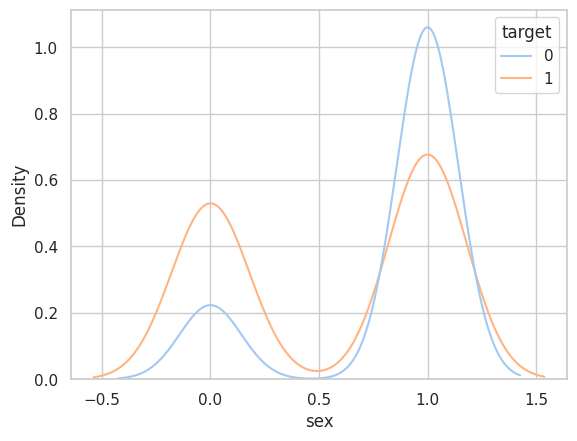

In [ ]:
#menampilkan distribusi dari kolom 'sex' dan 'target'
sns.kdeplot(data=df, x="sex", hue="target")

Kedua kurva di atas terlihat simetris. Hal ini berarti nilai median, modus, dan meannya sama. Dari kurva tersebut juga terlihat, 0 (perempuan) lebih banyak yang terkena penyakit jantung dibandingkan yang sehat. Sebaliknya, 1 (laki-laki) lebih banyak yang sehat dibandingkan yang terkena penyakit jantung. Biru (0) menggambarkan sehat dan oren (1) menggambarkan terkena penyakit jantung. Dari kurva tersebut juga terlihat bahwa data heart disease didominasi oleh laki-laki sebab kurva laki-laki lebih tinggi.

#Feature Engineering


## Fitur ke-1

In [ ]:
#membuat fitur baru kategori kolesterol
def Chol(chol):
  if chol < 200:
    return 'normal'
  else:
    return 'abnormal'

df.loc[:, 'chol_category'] = df['chol'].apply(Chol)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,abnormal
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,abnormal
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,abnormal
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,abnormal
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,abnormal
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,abnormal


Fitur kesatu yang ditambahkan adalah kategori kolestrol (chol category). Kolom tersebut mengelompokkan kolesterol pasien ke dalam kategori 'normal' atau 'abnormal' berdasarkan rentang yang telah ditentukan.

## Fitur ke-2

In [ ]:
#menambahkan fitur baru kategori denyut jantung
def Thalach(thalach):
  if 60 <= thalach <= 100:
    return 'normal'
  else:
    return 'abnormal'

df.loc[:, 'thalach_category'] = df['thalach'].apply(Thalach)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category,thalach_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,abnormal,abnormal
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,abnormal,abnormal
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal,abnormal
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,abnormal,abnormal
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,abnormal,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,abnormal,abnormal
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal,abnormal
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,abnormal,abnormal
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,abnormal,abnormal


Fitur kedua yang ditambahkan adalah kategori denyut jantung (thalach category). Kolom tersebut mengelompokkan denyut jantung pasien ke dalam kategori 'normal' atau 'abnormal' berdasarkan rentang yang telah ditentukan.

## Fitur ke-3

In [ ]:
#menambahkan fitur baru kategori tekanan darah
def Trestbps(trestbps):
  if 90 <= trestbps <= 120:
    return 'normal'
  elif trestbps <90:
    return 'hipotensi'
  else:
    return 'hipertensi'

df.loc[:, 'trestbps_category'] = df['trestbps'].apply(Trestbps)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category,thalach_category,trestbps_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,abnormal,abnormal,hipertensi
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,abnormal,abnormal,hipertensi
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal,abnormal,hipertensi
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,abnormal,abnormal,hipertensi
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,abnormal,abnormal,hipertensi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,abnormal,abnormal,normal
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal,abnormal,normal
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,abnormal,abnormal,hipertensi
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,abnormal,abnormal,hipertensi


Fitur ketiga yang ditambahkan adalah kategori tekanan darah (trestbps category). Kolom tersebut mengelompokkan denyut jantung pasien ke dalam kategori 'normal', 'hipotensi', atau 'hipertensi' berdasarkan rentang yang telah ditentukan.

#Modeling

## Feature Encoding

In [ ]:
# Mengubah kolom kategorikal menjadi beberapa kolom baru yang mewakili nilai-nilai kategorikal tersebut dengan menggunakan one-hot encoding.
df = pd.get_dummies(df, columns = ['chol_category', 'thalach_category', 'trestbps_category'])

In [ ]:
cat_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Menghapus kolom 'target' dari list cat_val.
cat_val.remove('target')

# Mengubah setiap kolom kategorikal menjadi beberapa kolom baru yang mewakili nilai-nilai kategorikal tersebut dengan menggunakan one-hot encoding.
df = pd.get_dummies(df, columns = cat_val)

# Mengganti nilai boolean dalam DataFrame dengan 0 dan 1.
df.replace({False: 0, True: 1}, inplace=True)

# Mengatur opsi Pandas untuk menampilkan semua kolom DataFrame.
pd.set_option('display.max_columns', None)

In [ ]:
# Menampilkan 5 data pertama.
df.head()

,age,trestbps,chol,thalach,oldpeak,target,chol_category_abnormal,chol_category_normal,thalach_category_abnormal,thalach_category_normal,trestbps_category_hipertensi,trestbps_category_normal,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


Setelah dilakukan feature encoding, terlihat bahwa data sekarang sudah berubah menjadi numerik semua dan dapat dimodelkan.

## Splitting Data

In [ ]:
# Input variabel x dengan semua kolom dan drop kolom target, karena kolom target digunakan sebagai tujuan.
x = df.drop('target',axis = 1)

# Input kolom target ke variabel y.
y = df['target'].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data train 80% dan data test 20%.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Membagi dataset menjadi dua bagian, yaitu data training dan data testing. Data training (80% dari data keseluruhan) berfungsi untuk melatih model sedangkan data testing (20% dari data keseluruhan) berfungsi untuk menguji seberapa baik model dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya. Tujuan akhirnya adalah untuk memastikan bahwa model yang dilatih dapat menghasilkan prediksi yang akurat pada data baru yang belum pernah dilihat sebelumnya.

## Pemeriksaan Data

In [ ]:
# Memeriksa apakah terdapat nilai null dalam dataset x_train.
x_train.isnull().sum()

age                             0
trestbps                        0
chol                            0
thalach                         0
oldpeak                         0
chol_category_abnormal          0
chol_category_normal            0
thalach_category_abnormal       0
thalach_category_normal         0
trestbps_category_hipertensi    0
trestbps_category_normal        0
sex_0                           0
sex_1                           0
cp_0                            0
cp_1                            0
cp_2                            0
cp_3                            0
fbs_0                           0
fbs_1                           0
restecg_0                       0
restecg_1                       0
restecg_2                       0
exang_0                         0
exang_1                         0
slope_0                         0
slope_1                         0
slope_2                         0
ca_0                            0
ca_1                            0
ca_2          

Terlihat tidak ada nilai null pada semua kolom di data training di variabel x.

In [ ]:
# Memeriksa apakah terdapat nilai null dalam dataset x_test.
x_test.isnull().sum()

age                             0
trestbps                        0
chol                            0
thalach                         0
oldpeak                         0
chol_category_abnormal          0
chol_category_normal            0
thalach_category_abnormal       0
thalach_category_normal         0
trestbps_category_hipertensi    0
trestbps_category_normal        0
sex_0                           0
sex_1                           0
cp_0                            0
cp_1                            0
cp_2                            0
cp_3                            0
fbs_0                           0
fbs_1                           0
restecg_0                       0
restecg_1                       0
restecg_2                       0
exang_0                         0
exang_1                         0
slope_0                         0
slope_1                         0
slope_2                         0
ca_0                            0
ca_1                            0
ca_2          

Terlihat tidak ada pula nilai null pada semua kolom di data testing di variabel x.

In [ ]:
# Memeriksa apakah terdapat data yang duplikat dalam dataset.
df.duplicated().sum()

0

Terlihat tidak terdapat data duplikat pada dataset  yang akan digunakan.

## Alasan Pemilihan Model

Kasus heart diseases merupakan kasus klasifikasi sehingga akan digunakan beberapa model klasifikasi seperti SVM, Random Forest, dan Gradient Boosting. Berikut adalah alasan mengapa model-model tersebut cocok untuk diterapkan dalam kasus ini:

1. Support Vector Machine (SVM):
SVM dengan kernel non-linear, seperti kernel radial basis function (RBF), dapat menangani kasus-kasus di mana hubungan antara fitur dan output tidak linier. SVM juga memiliki mekanisme penalti terhadap pembersihan (misalnya, C parameter pada fungsi kerugian) yang memungkinkannya mengatasi masalah overfitting.

2. Random Forest:
Random forest adalah model ensemble yang menggabungkan beberapa decision tree, yang memungkinkannya untuk mengatasi overfitting dan meningkatkan kinerja prediksi secara keseluruhan. Random forest mampu menangani data yang tidak sempurna atau memiliki noise dengan baik karena menggunakan banyak pohon keputusan yang dapat menghasilkan hasil yang lebih konsisten.

3. Gradient Boosting:
Gradient boosting sering kali memberikan kinerja prediksi yang sangat baik, terutama ketika dihadapkan pada dataset dengan banyak fitur atau ketidakseimbangan kelas. Gradient boosting dapat menangani data yang sangat kompleks dan menangkap hubungan non-linear antara fitur dan output dengan baik.

## Model Support Vector Machines (SVM)

In [ ]:
# Import library svm.
from sklearn import svm

# Inisialisasi model.
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)

# Melihat skor training dan testing.
print("Training Scores:", model_svm.score(x_train, y_train))
print("Testing Scores:", model_svm.score(x_test, y_test))

Training Scores: 0.8755186721991701
Testing Scores: 0.8032786885245902


Berdasarkan output di atas, training scores adalah 0.8755186721991701 atau sekitar 87.55% dan testing scores adalah 0.8032786885245902 atau sekitar 80.33%. Ini menunjukkan bahwa model svm memiliki performa yang baik dalam mempelajari pola dari data training (training scores tinggi yaitu 87.55%) dan dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya (testing scores yang cukup tinggi juga yaitu 80.33%). Dalam hal ini, perbedaan antara training scores dan testing scores tidak terlalu besar yaitu sekitar 7.22%. Hal tersebut menunjukkan bahwa model tersebut memiliki kinerja yang normal dengan sedikit tanda-tanda overfitting.

### Classification Report

In [ ]:
# Import library classification report.
from sklearn.metrics import classification_report

# Menghitung dan mencetak classification report yang mencakup berbagai metrik evaluasi.
y_test_model_svm = model_svm.predict(x_test)
print(classification_report(y_test, y_test_model_svm))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



1. Precision

Precision mengukur proporsi positif yang sebenarnya dari semua contoh yang diprediksi positif oleh model. Dalam kasus heart diseases ini, precision untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.88. Hal ini berarti dari semua contoh yang diprediksi positif oleh model untuk kelas 0, 88% di antaranya adalah benar-benar positif. Begitu juga, untuk kelas 1, precision untuk kelas 1 (memiliki penyakit jantung) adalah 0.74. Hal ini berarti 74% dari contoh yang diprediksi positif oleh model adalah benar-benar positif.

2. Recall

Recall (juga dikenal sebagai sensitivity) mengukur proporsi positif yang benar dari semua contoh yang sebenarnya positif dalam dataset. Dalam kasus heart diseases ini, recall untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.72 dan recall untuk kelas 1 (memiliki penyakit jantung) adalah 0.90. Hal ini berarti model berhasil mendeteksi 72% dari semua kasus yang sebenarnya positif untuk kelas 0, dan 90% dari semua kasus yang sebenarnya positif untuk kelas 1.

3. F1-score

F1-score adalah rata-rata tertimbang antara precision dan recall. F1-score mencakup kedua metrik ini dan memberikan nilai tunggal yang menggambarkan keseimbangan antara precision dan recall. Dalam kasus heart diseases ini, F1-score untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.79 dan untuk kelas 1 (memiliki penyakit jantung) adalah 0.81.

4. Support

Support adalah jumlah contoh dalam setiap kelas dalam dataset. Dalam kasus heart diseases ini, ada 32 contoh kelas 0 (tidak memiliki penyakit jantung) dan 29 contoh kelas 1 (memiliki penyakit jantung) dalam dataset.

5. Accuracy

Akurasi adalah rasio dari jumlah prediksi yang benar terhadap jumlah total contoh dalam dataset. Dalam kasus heart diseases ini, akurasinya adalah 0.80 atau 80%, yang berarti model secara keseluruhan memprediksi dengan benar 80% dari seluruh contoh dalam dataset.

6. Macro Average dan Weighted Average

Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas, tanpa memperhitungkan seberapa banyak setiap kelas muncul dalam dataset. Weighted average adalah rata-rata tertimbang di mana setiap nilai diberi bobot berdasarkan jumlah contoh dalam setiap kelas. Dalam kasus ini, weighted average (0.80) sedikit lebih rendah daripada macro average (0.81), yang menunjukkan adanya ketidakseimbangan dalam distribusi kelas atau bobot yang berbeda-beda antara kelas.

Alasan pemilihan metric evaluation classification report adalah sebab kasus heart diseases ini merupakan kasus klasifikasi.

### Learning Curve

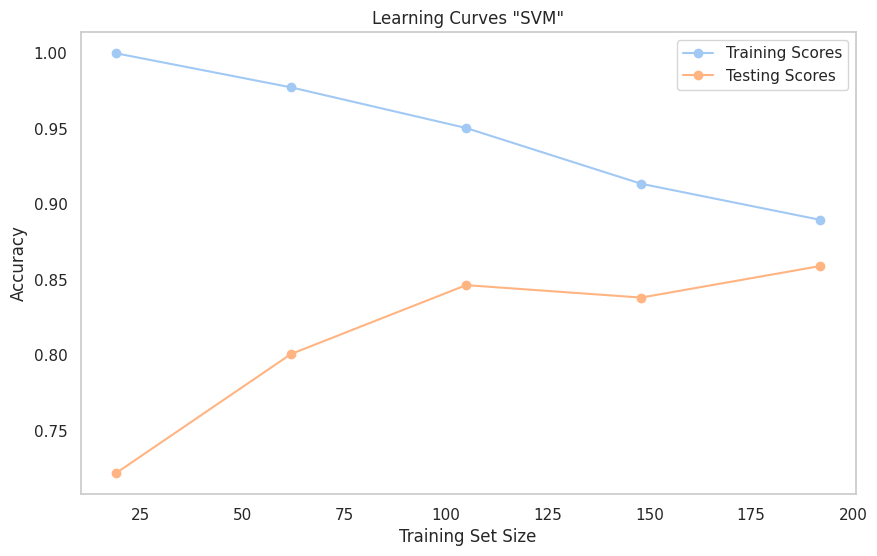

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

train_sizes, train_scores, test_scores = learning_curve(
    model_svm, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv = kf, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label = 'Training Scores', marker = 'o')
plt.plot(train_sizes, test_scores_mean, label = 'Testing Scores', marker = 'o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves "SVM"')
plt.legend()
plt.grid()
plt.show()

Dari kurva di atas terlihat bahwa training scores atau performa model dalam mempelajari pola dari data training lebih besar nilainya dibandingkan testing scores atau kemampuan model dalam menggeneralisasi data baru yang belum pernah dilihat sebelumnya. Jarak antar dua kurva tersebut juga tidak terlalu jauh sehingga model memiliki kinerja yang normal dengan sedikit tanda-tanda overfitting.

In [ ]:
print(train_scores_mean)
print(test_scores_mean)

[1.         0.97741935 0.95047619 0.91351351 0.88958333]
[0.72168367 0.80068027 0.84634354 0.83809524 0.85901361]


Dari skor pelatihan (training scores mean) dapat terlihat bahwa skor pelatihan terus menurun ketika data pelatihan ditambah, namun meskipun terus menurun akurasinya tetap masih tinggi. Ini menunjukkan bahwa model SVM mampu dengan baik mempelajari pola yang ada dalam data training. Tapi tidak terlalu baik sebab grafiknya terus menurun ketika data ditambah.

Dari skor validasi (testing scores mean) dapat terlihat bahwa skor validasi terus menaik meskipun sempat turun 1 kali dan itu pun tidak jauh nilai turun akurasinya. Hal ini menunjukkan bahwa model dapat lebih baik dalam memprediksi data baru ketika dilatih dengan lebih banyak data.

### Confusion Matrix

In [ ]:
# Membuat prediksi pada data uji (x_test) menggunakan model SVM yang telah dilatih sebelumnya (model_svm).
y_test_model_svm = model_svm.predict(x_test)

In [ ]:
# Import library confusion matrix.
from sklearn.metrics import confusion_matrix

# Menggunakan fungsi confusion_matrix untuk menghitung dan mencetak matriks.
model_svm = confusion_matrix(y_test, y_test_model_svm)
print('Hasil Prediksi SVM \n', model_svm)
print('True Positive = ', model_svm [1,1])
print('True Negative = ', model_svm [0,0])
print('False Positive = ', model_svm [0,1])
print('False Negative = ', model_svm [1,0])


Hasil Prediksi SVM 
 [[23  9]
 [ 3 26]]
True Positive =  26
True Negative =  23
False Positive =  9
False Negative =  3


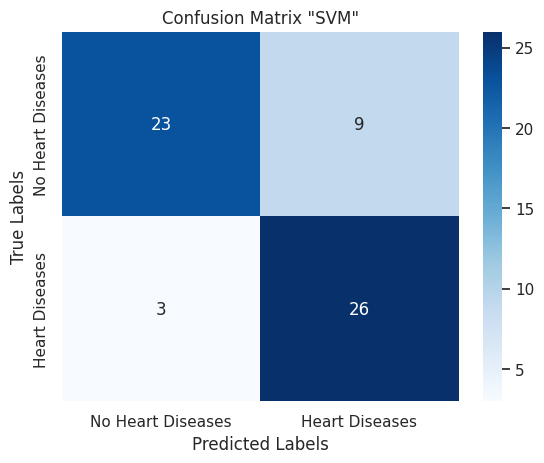

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_model_svm)
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix "SVM"');
ax.xaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);
ax.yaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);

1. True Positive (TP)

Ada 26 prediksi yang benar-benar positif, yang berarti model berhasil mengklasifikasikan 26 sampel yang sebenarnya termasuk dalam kelas positif (memiliki penyakit jantung) dengan benar.

2. True Negative (TN)

Ada 23 prediksi yang benar-benar negatif, yang berarti model berhasil mengklasifikasikan 23 sampel yang sebenarnya termasuk dalam kelas negatif (tidak memiliki penyakit jantung) dengan benar.

3. False Positive (FP)

Ada 9 prediksi yang salah positif, yang berarti model salah mengklasifikasikan 9 pasien sebagai kelas positif (memiliki penyakit jantung), padahal sebenarnya kelas negatif (tidak memiliki penyakit jantung).

4. False Negative (FN)

Ada 3 prediksi yang salah negatif, yang berarti model salah mengklasifikasikan 3 pasien sebagai kelas negatif (tidak memiliki penyakit jantung), padahal sebenarnya kelas positif (memiliki penyakit jantung).

Alasan pemilihan metric evaluation confusion matrix adalah sebab kasus heart diseases ini merupakan kasus klasifikasi.

### Cross Validation dengan Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Mendefinisikan model SVM.
model = SVC()

# Menentukan parameter yang akan dioptimalkan.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Inisialisasi GridSearchCV.
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1)

# Melatih model dengan data pelatihan.
grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik yang ditemukan.
print("Parameter terbaik:", grid_search.best_params_)

# Menampilkan skor akurasi silang terbaik.
print("Skor akurasi silang terbaik:", grid_search.best_score_)

Parameter terbaik: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Skor akurasi silang terbaik: 0.8214285714285715


Berdasarkan output di atas, terlihat bahwa best parameter dalam kasus ini adalah C: 1, gamma: scale, kernel: linear. Yang di mana itu adalah parameter default. Dengan menggunakan metode cross validation juga terlihat bahwa nilai akurasi silang terbaik dari model ini adalah 0.8214285714285715 atau sekitar 82.14%.

In [ ]:
# Import library svm.
from sklearn import svm

# Inisialisasi model.
model_svm = svm.SVC(C = 1, gamma = 'scale', kernel = 'linear')
model_svm.fit(x_train, y_train)

# Melihat skor training dan testing.
print("Training Scores:", model_svm.score(x_train, y_train))
print("Testing Scores:", model_svm.score(x_test, y_test))

Training Scores: 0.8755186721991701
Testing Scores: 0.8032786885245902


Berdasarkan output di atas, training scores adalah 0.8755186721991701 atau sekitar 87.55% dan testing scores adalah 0.8032786885245902 atau sekitar 80.33%. Nilai tersebut sama seperti nilai awal atau nilai sebelum dilakukan hyperparameter tuning. Hal ini dikarenakan best parameter dari model ini adalah parameter default. Sehingga learning curves, classification report, confusion matrix, dsb akan sama pula seperti sebelum di hyperparameter tuning.

## Model Random Forest

In [ ]:
# Import library Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model.
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
model_rf.fit(x_train, y_train)

# Melihat skor training dan testing.
print("Training Scores:", model_rf.score(x_train, y_train))
print("Testing Scores:", model_rf.score(x_test, y_test))

Training Scores: 1.0
Testing Scores: 0.819672131147541


Berdasarkan output di atas, training scores adalah 1.0 atau 100% dan testing scores adalah 0.819672131147541 atau sekitar 81.97%. Ini menunjukkan bahwa model memiliki performa yang sangat baik dalam mempelajari pola dari data training (training scores sangat tinggi yaitu 100%) dan dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya (testing scores yang cukup tinggi yaitu 81.97%). Dalam hal ini, perbedaan antara training scores dan testing scores sangat besar yaitu 18.03%. Hal tersebut menunjukkan bahwa model mengalami overfitting.

### Classification Report

In [ ]:
# Import library classification report.
from sklearn.metrics import classification_report

# Menghitung dan mencetak classification report yang mencakup berbagai metrik evaluasi.
y_test_model_rf = model_rf.predict(x_test)
print(classification_report(y_test, y_test_model_rf))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



1. Precision

Precision mengukur proporsi positif yang sebenarnya dari semua contoh yang diprediksi positif oleh model. Dalam kasus heart diseases ini, precision untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.89. Hal ini berarti dari semua contoh yang diprediksi positif oleh model untuk kelas 0, 89% di antaranya adalah benar-benar positif. Begitu juga, untuk kelas 1, precision untuk kelas 1 (memiliki penyakit jantung) adalah 0.76. Hal ini berarti 76% dari contoh yang diprediksi positif oleh model adalah benar-benar positif.

2. Recall

Recall (juga dikenal sebagai sensitivity) mengukur proporsi positif yang benar dari semua contoh yang sebenarnya positif dalam dataset. Dalam kasus heart diseases ini, recall untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.75 dan recall untuk kelas 1 (memiliki penyakit jantung) adalah 0.90. Hal ini berarti model berhasil mendeteksi 75% dari semua kasus yang sebenarnya positif untuk kelas 0, dan 90% dari semua kasus yang sebenarnya positif untuk kelas 1.

3. F1-score

F1-score adalah rata-rata tertimbang antara precision dan recall. F1-score mencakup kedua metrik ini dan memberikan nilai tunggal yang menggambarkan keseimbangan antara precision dan recall. Dalam kasus heart diseases ini, F1-score untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.81 dan untuk kelas 1 (memiliki penyakit jantung) adalah 0.83.

4. Support

Support adalah jumlah contoh dalam setiap kelas dalam dataset. Dalam kasus heart diseases ini, ada 32 contoh kelas 0 (tidak memiliki penyakit jantung) dan 29 contoh kelas 1 (memiliki penyakit jantung) dalam dataset.

5. Accuracy

Akurasi adalah rasio dari jumlah prediksi yang benar terhadap jumlah total contoh dalam dataset. Dalam kasus heart diseases ini, akurasinya adalah 0.82 atau 82%, yang berarti model secara keseluruhan memprediksi dengan benar 82% dari seluruh contoh dalam dataset.

6. Macro Average dan Weighted Average

Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas, tanpa memperhitungkan seberapa banyak setiap kelas muncul dalam dataset. Weighted average adalah rata-rata tertimbang di mana setiap nilai diberi bobot berdasarkan jumlah contoh dalam setiap kelas. Dalam kasus ini, kedua rata-rata tersebut adalah 0.82 untuk precision, recall, dan f1-score. Ini menunjukkan bahwa model secara keseluruhan memiliki kinerja yang baik dalam melakukan prediksi untuk setiap kelas.

Alasan pemilihan metric evaluation classification report adalah sebab kasus heart diseases ini merupakan kasus klasifikasi.

### Learning Curve

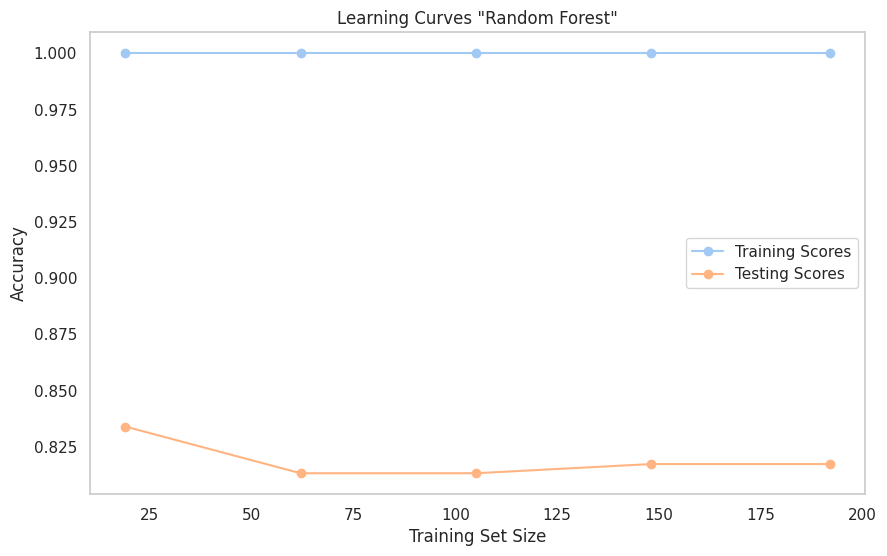

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

train_sizes, train_scores, test_scores = learning_curve(
    model_rf, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv = kf, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label = 'Training Scores', marker = 'o')
plt.plot(train_sizes, test_scores_mean, label = 'Testing Scores', marker = 'o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves "Random Forest"')
plt.legend()
plt.grid()
plt.show()

Dari kurva di atas terlihat bahwa training scores atau performa model dalam mempelajari pola dari data training lebih besar nilainya dibandingkan testing scores atau kemampuan model dalam menggeneralisasi data baru yang belum pernah dilihat sebelumnya. Jarak antar dua kurva tersebut cukup jauh sehingga model mengalami overfitting.

In [ ]:
print(train_scores_mean)
print(test_scores_mean)

[1. 1. 1. 1. 1.]
[0.83392857 0.81318027 0.81318027 0.8172619  0.8172619 ]


Dari skor pelatihan (training scores mean) dapat terlihat bahwa skor pelatihan konstan di nilai 1. Ini menunjukkan bahwa model Random Forest mampu dengan baik mempelajari pola yang ada dalam data training.

Dari skor validasi (testing scores mean) dapat terlihat juga bahwa skor validasi turun dari 0.83 ke 0.81 dan terus konstan di nilai 0.81. Hal ini menunjukkan bahwa penambahan data tidak terlalu berpengaruh pada model.

### Confusion Matrix

In [ ]:
# Membuat prediksi pada data uji (x_test) menggunakan model Random Forest yang telah dilatih sebelumnya (model_rf).
y_test_model_rf = model_rf.predict(x_test)

In [ ]:
# Import library confussion matrix.
from sklearn.metrics import confusion_matrix

# Menggunakan fungsi confusion_matrix untuk menghitung dan mencetak matriks.
model_rf = confusion_matrix(y_test, y_test_model_rf)
print('Hasil Prediksi Random Forest \n', model_rf)
print('True Positive = ', model_rf [1,1])
print('True Negative = ', model_rf [0,0])
print('False Positive = ', model_rf [0,1])
print('False Negative = ', model_rf [1,0])

Hasil Prediksi Random Forest 
 [[24  8]
 [ 3 26]]
True Positive =  26
True Negative =  24
False Positive =  8
False Negative =  3


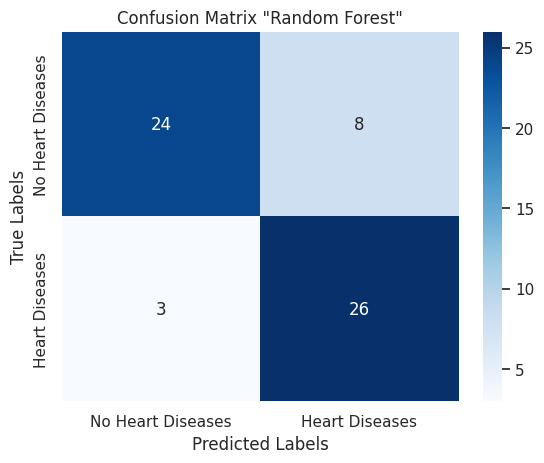

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_model_rf)
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix "Random Forest"');
ax.xaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);
ax.yaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);

1. True Positive (TP)

Ada 26 prediksi yang benar-benar positif, yang berarti model berhasil mengklasifikasikan 26 sampel yang sebenarnya termasuk dalam kelas positif (memiliki penyakit jantung) dengan benar.

2. True Negative (TN)

Ada 24 prediksi yang benar-benar negatif, yang berarti model berhasil mengklasifikasikan 24 sampel yang sebenarnya termasuk dalam kelas negatif (tidak memiliki penyakit jantung) dengan benar.

3. False Positive (FP)

Ada 8 prediksi yang salah positif, yang berarti model salah mengklasifikasikan 8 pasien sebagai kelas positif (memiliki penyakit jantung), padahal sebenarnya kelas negatif (tidak memiliki penyakit jantung).

4. False Negative (FN)

Ada 3 prediksi yang salah negatif, yang berarti model salah mengklasifikasikan 3 pasien sebagai kelas negatif (tidak memiliki penyakit jantung), padahal sebenarnya kelas positif (memiliki penyakit jantung).

Alasan pemilihan metric evaluation confusion matrix adalah sebab kasus heart diseases ini merupakan kasus klasifikasi.

### Cross Validation dengan Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Mendefinisikan model Random Forest.
model = RandomForestClassifier()

# Menentukan parameter yang akan dioptimalkan.
param_grid = {'n_estimators': [25, 50, 100, 150],
'max_features': ['sqrt', 'log2', None],
'max_depth': [3, 6, 9],
'max_leaf_nodes': [3, 6, 9]}


# Inisialisasi GridSearchCV.
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1)

# Melatih model dengan data pelatihan.
grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik yang ditemukan.
print("Parameter terbaik:", grid_search.best_params_)

# Menampilkan skor akurasi silang terbaik.
print("Skor akurasi silang terbaik:", grid_search.best_score_)

Parameter terbaik: {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100}
Skor akurasi silang terbaik: 0.8383503401360544


Berdasarkan output di atas, terlihat bahwa best parameter dalam kasus ini adalah max_depth: 9, max_features: sqrt, max_leaf_nodes: 9, n_estimators: 100. Dengan menggunakan metode cross validation juga terlihat bahwa nilai akurasi silang terbaik dari model ini adalah 0.8383503401360544 atau sekitar 83.84%.

In [ ]:
# Import library Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model.
model_rf = RandomForestClassifier(max_depth = 9, max_features = 'sqrt', max_leaf_nodes = 9, n_estimators = 100, random_state = 42)
model_rf.fit(x_train, y_train)

# Melihat skor training dan testing.
print("Training Scores:", model_rf.score(x_train, y_train))
print("Testing Scores:", model_rf.score(x_test, y_test))

Training Scores: 0.8962655601659751
Testing Scores: 0.819672131147541


Berdasarkan output di atas terlihat bahwa memperbaiki model tersebut yang awalnya overfitting (training scores adalah 1.0 atau 100% dan testing scores adalah 0.819672131147541 atau sekitar 81.97%) menjadi kategori normal (training scores adalah 0.8962655601659751 atau 89.63% dan testing scores adalah 0.819672131147541 atau sekitar 81.97%).

### Classification Report Setelah Hyperparameter Tuning

In [ ]:
# Import library classification report.
from sklearn.metrics import classification_report

# Menghitung dan mencetak classification report yang mencakup berbagai metrik evaluasi.
y_test_model_rf = model_rf.predict(x_test)
print(classification_report(y_test, y_test_model_rf))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



1. Precision

Precision mengukur proporsi positif yang sebenarnya dari semua contoh yang diprediksi positif oleh model. Dalam kasus heart diseases ini, precision untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.89. Hal ini berarti dari semua contoh yang diprediksi positif oleh model untuk kelas 0, 89% di antaranya adalah benar-benar positif. Begitu juga, untuk kelas 1, precision untuk kelas 1 (memiliki penyakit jantung) adalah 0.76. Hal ini berarti 76% dari contoh yang diprediksi positif oleh model adalah benar-benar positif.

2. Recall

Recall (juga dikenal sebagai sensitivity) mengukur proporsi positif yang benar dari semua contoh yang sebenarnya positif dalam dataset. Dalam kasus heart diseases ini, recall untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.75 dan recall untuk kelas 1 (memiliki penyakit jantung) adalah 0.90. Hal ini berarti model berhasil mendeteksi 75% dari semua kasus yang sebenarnya positif untuk kelas 0, dan 90% dari semua kasus yang sebenarnya positif untuk kelas 1.

3. F1-score

F1-score adalah rata-rata tertimbang antara precision dan recall. F1-score mencakup kedua metrik ini dan memberikan nilai tunggal yang menggambarkan keseimbangan antara precision dan recall. Dalam kasus heart diseases ini, F1-score untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.81 dan untuk kelas 1 (memiliki penyakit jantung) adalah 0.83.

4. Support

Support adalah jumlah contoh dalam setiap kelas dalam dataset. Dalam kasus heart diseases ini, ada 32 contoh kelas 0 (tidak memiliki penyakit jantung) dan 29 contoh kelas 1 (memiliki penyakit jantung) dalam dataset.

5. Accuracy

Akurasi adalah rasio dari jumlah prediksi yang benar terhadap jumlah total contoh dalam dataset. Dalam kasus heart diseases ini, akurasinya adalah 0.82 atau 82%, yang berarti model secara keseluruhan memprediksi dengan benar 82% dari seluruh contoh dalam dataset.

6. Macro Average dan Weighted Average

Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas, tanpa memperhitungkan seberapa banyak setiap kelas muncul dalam dataset. Weighted average adalah rata-rata tertimbang di mana setiap nilai diberi bobot berdasarkan jumlah contoh dalam setiap kelas. Dalam kasus ini, kedua rata-rata tersebut adalah 0.82 untuk precision, recall, dan f1-score. Ini menunjukkan bahwa model secara keseluruhan memiliki kinerja yang baik dalam melakukan prediksi untuk setiap kelas.

### Learning Curve Setelah Hyperparameter Tuning

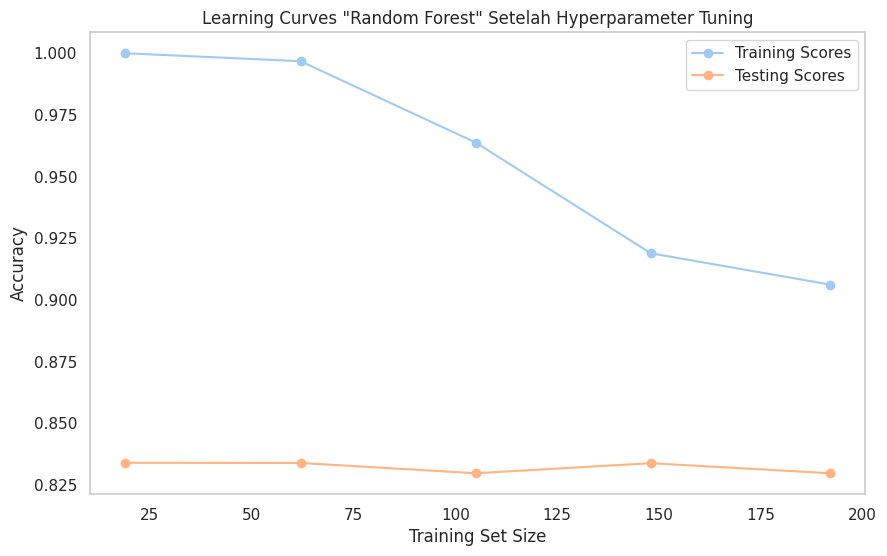

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

train_sizes, train_scores, test_scores = learning_curve(
    model_rf, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv = kf, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label = 'Training Scores', marker = 'o')
plt.plot(train_sizes, test_scores_mean, label = 'Testing Scores', marker = 'o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves "Random Forest" Setelah Hyperparameter Tuning')
plt.legend()
plt.grid()
plt.show()

Dari kurva di atas terlihat bahwa training scores atau performa model dalam mempelajari pola dari data training lebih besar nilainya dibandingkan testing scores atau kemampuan model dalam menggeneralisasi data baru yang belum pernah dilihat sebelumnya. Jarak antar dua kurva tersebut masih cukup jauh tetapi jauh lebih baik jika dibandingkan dengan sebelum dilakukan hyperparameter tuning.

In [ ]:
print(train_scores_mean)
print(test_scores_mean)

[1.         0.99677419 0.96380952 0.91891892 0.90625   ]
[0.83401361 0.83392857 0.8297619  0.83384354 0.8297619 ]


Dari skor pelatihan (training scores mean) dapat terlihat bahwa skor pelatihan terus menurun ketika data pelatihan ditambah, namun meskipun terus menurun akurasinya tetap masih tinggi. Ini menunjukkan bahwa model Random Forest mampu dengan baik mempelajari pola yang ada dalam data training. Tapi tidak terlalu baik sebab grafiknya terus menurun ketika data ditambah.

Dari skor validasi (testing scores mean) dapat terlihat bahwa skor validasi turun naik tetapi dalam nilai yang tidak jauh. Hal ini menunjukkan bahwa banyaknya data training yang digunakan mempengaruhi skor validasi model.

### Confusion Matrix Setelah Hyperparameter Tuning

In [ ]:
# Membuat prediksi pada data uji (x_test) menggunakan model Random Forest yang telah dilatih sebelumnya (model_rf).
y_test_model_rf = model_rf.predict(x_test)

In [ ]:
# Import library confussion matrix.
from sklearn.metrics import confusion_matrix

# Menggunakan fungsi confusion_matrix untuk menghitung dan mencetak matriks.
model_rf = confusion_matrix(y_test, y_test_model_rf)
print('Hasil Prediksi Random Forest \n', model_rf)
print('True Positive = ', model_rf [1,1])
print('True Negative = ', model_rf [0,0])
print('False Positive = ', model_rf [0,1])
print('False Negative = ', model_rf [1,0])

Hasil Prediksi Random Forest 
 [[24  8]
 [ 3 26]]
True Positive =  26
True Negative =  24
False Positive =  8
False Negative =  3


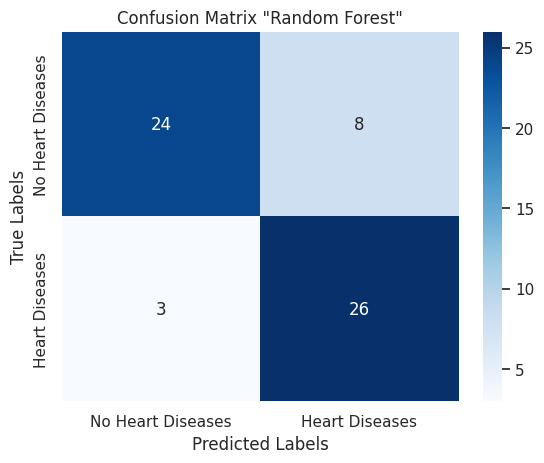

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_model_rf)
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix "Random Forest"');
ax.xaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);
ax.yaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);

1. True Positive (TP)

Ada 26 prediksi yang benar-benar positif, yang berarti model berhasil mengklasifikasikan 26 sampel yang sebenarnya termasuk dalam kelas positif (memiliki penyakit jantung) dengan benar.

2. True Negative (TN)

Ada 24 prediksi yang benar-benar negatif, yang berarti model berhasil mengklasifikasikan 24 sampel yang sebenarnya termasuk dalam kelas negatif (tidak memiliki penyakit jantung) dengan benar.

3. False Positive (FP)

Ada 8 prediksi yang salah positif, yang berarti model salah mengklasifikasikan 8 pasien sebagai kelas positif (memiliki penyakit jantung), padahal sebenarnya kelas negatif (tidak memiliki penyakit jantung).

4. False Negative (FN)

Ada 3 prediksi yang salah negatif, yang berarti model salah mengklasifikasikan 3 pasien sebagai kelas negatif (tidak memiliki penyakit jantung), padahal sebenarnya kelas positif (memiliki penyakit jantung).

## Model Gradient Boosting

In [ ]:
# Import library Gradient Boosting.
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model.
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

# Melihat skor training dan testing.
print("Training Scores:", model_gb.score(x_train, y_train))
print("Testing Scores:", model_gb.score(x_test, y_test))

Training Scores: 1.0
Testing Scores: 0.8032786885245902


Berdasarkan output di atas, training scores adalah 1.0 atau sekitar 100% dan testing scores adalah 0.8032786885245902 atau sekitar 80.33%. Ini menunjukkan bahwa model memiliki performa yang sangat baik dalam mempelajari pola dari data training (training scores sangat tinggi yaitu 100%) dan dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya (testing scores yang cukup tinggi juga yaitu 80.33%). Dalam hal ini, perbedaan antara training scores dan testing scores sangat besar yaitu 19.67%. Hal tersebut menunjukkan bahwa model mengalami overfitting.

### Classification Report

In [ ]:
# Import library classification report.
from sklearn.metrics import classification_report

# Menghitung dan mencetak classification report yang mencakup berbagai metrik evaluasi.
y_test_model_gb = model_gb.predict(x_test)
print(classification_report(y_test, y_test_model_gb))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



1. Precision

Precision mengukur proporsi positif yang sebenarnya dari semua contoh yang diprediksi positif oleh model. Dalam kasus heart diseases ini, precision untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.88. Hal ini berarti dari semua contoh yang diprediksi positif oleh model untuk kelas 0, 88% di antaranya adalah benar-benar positif. Begitu juga, untuk kelas 1, precision untuk kelas 1 (memiliki penyakit jantung) adalah 0.74. Hal ini berarti 74% dari contoh yang diprediksi positif oleh model adalah benar-benar positif.

2. Recall

Recall (juga dikenal sebagai sensitivity) mengukur proporsi positif yang benar dari semua contoh yang sebenarnya positif dalam dataset. Dalam kasus heart diseases ini, recall untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.72 dan recall untuk kelas 1 (memiliki penyakit jantung) adalah 0.90. Hal ini berarti model berhasil mendeteksi 72% dari semua kasus yang sebenarnya positif untuk kelas 0, dan 90% dari semua kasus yang sebenarnya positif untuk kelas 1.

3. F1-score

F1-score adalah rata-rata tertimbang antara precision dan recall. F1-score mencakup kedua metrik ini dan memberikan nilai tunggal yang menggambarkan keseimbangan antara precision dan recall. Dalam kasus heart diseases ini, F1-score untuk kelas 0 (tidak memiliki penyakit jantung) adalah 0.79 dan untuk kelas 1 (memiliki penyakit jantung) adalah 0.81.

4. Support

Support adalah jumlah contoh dalam setiap kelas dalam dataset. Dalam kasus heart diseases ini, ada 32 contoh kelas 0 (tidak memiliki penyakit jantung) dan 29 contoh kelas 1 (memiliki penyakit jantung) dalam dataset.

5. Accuracy

Akurasi adalah rasio dari jumlah prediksi yang benar terhadap jumlah total contoh dalam dataset. Dalam kasus heart diseases ini, akurasinya adalah 0.80 atau 80%, yang berarti model secara keseluruhan memprediksi dengan benar 80% dari seluruh contoh dalam dataset.

6. Macro Average dan Weighted Average

Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas, tanpa memperhitungkan seberapa banyak setiap kelas muncul dalam dataset. Weighted average adalah rata-rata tertimbang di mana setiap nilai diberi bobot berdasarkan jumlah contoh dalam setiap kelas. Dalam kasus ini, weighted average (0.80) sedikit lebih rendah daripada macro average (0.81), yang menunjukkan adanya ketidakseimbangan dalam distribusi kelas atau bobot yang berbeda-beda antara kelas.

Alasan pemilihan metric evaluation classification report adalah sebab kasus heart diseases ini merupakan kasus klasifikasi.

### Learning Curve

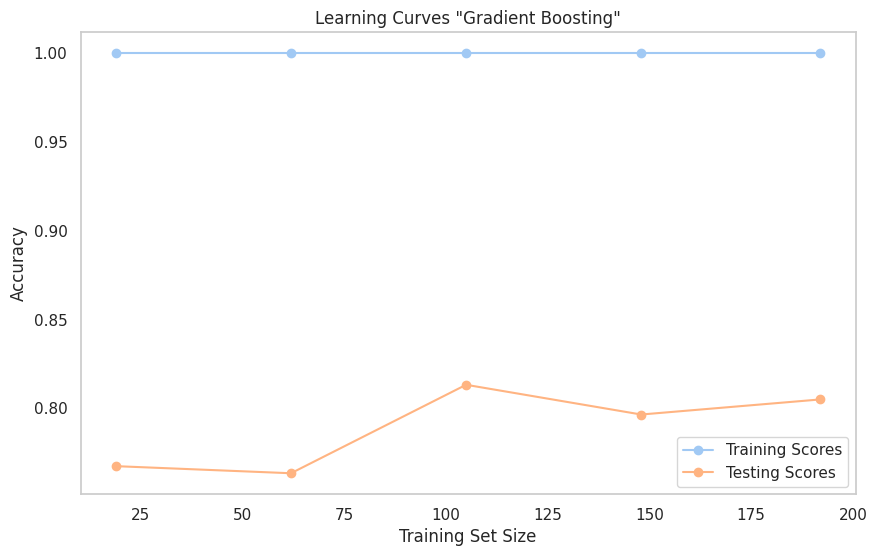

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

train_sizes, train_scores, test_scores = learning_curve(
    model_gb, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv = kf, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label = 'Training Scores', marker = 'o')
plt.plot(train_sizes, test_scores_mean, label = 'Testing Scores', marker = 'o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves "Gradient Boosting"')
plt.legend()
plt.grid()
plt.show()

Dari kurva di atas terlihat bahwa training scores atau performa model dalam mempelajari pola dari data training lebih besar nilainya dibandingkan testing scores atau kemampuan model dalam menggeneralisasi data baru yang belum pernah dilihat sebelumnya. Jarak antar dua kurva tersebut juga cukup jauh sehingga model mengalami overfitting.

In [ ]:
print(train_scores_mean)
print(test_scores_mean)

[1. 1. 1. 1. 1.]
[0.76743197 0.76343537 0.81326531 0.79651361 0.80501701]


Dari skor pelatihan (training scores mean) dapat terlihat bahwa skor pelatihan konstan di nilai 1. Ini menunjukkan bahwa model Gradien Boosting mampu dengan baik mempelajari pola yang ada dalam data training.

Dari skor validasi (testing scores mean) dapat terlihat bahwa skor validasi turun naik tetapi dalam nilai yang tidak jauh. Hal ini menunjukkan bahwa banyak data training yang diproses mempengaruhi skor validasi model.

In [ ]:
# Membuat prediksi pada data uji (x_test) menggunakan model Gradien Boosting yang telah dilatih sebelumnya (model_gb).
y_test_model_gb = model_gb.predict(x_test)

In [ ]:
# Import library confusion matrix.
from sklearn.metrics import confusion_matrix

# Menggunakan fungsi confusion_matrix untuk menghitung dan mencetak matriks.
model_gb = confusion_matrix(y_test, y_test_model_gb)
print('Hasil Prediksi Gradient Boosting \n', model_gb)
print('True Positive = ', model_gb [1,1])
print('True Negative = ', model_gb [0,0])
print('False Positive = ', model_gb [0,1])
print('False Negative = ', model_gb [1,0])

Hasil Prediksi Gradient Boosting 
 [[23  9]
 [ 3 26]]
True Positive =  26
True Negative =  23
False Positive =  9
False Negative =  3


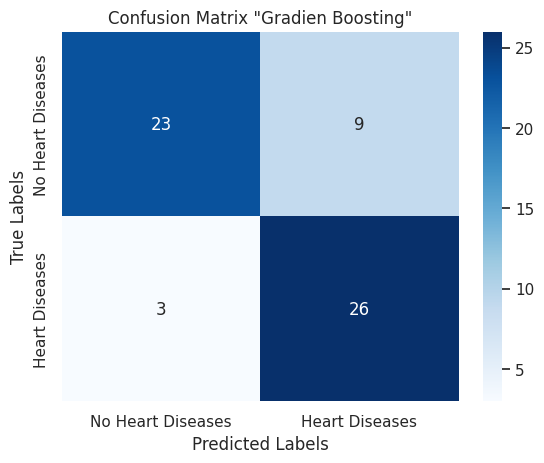

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_model_gb)
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Blues');

ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix "Gradien Boosting"');
ax.xaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);
ax.yaxis.set_ticklabels(['No Heart Diseases', 'Heart Diseases']);

1. True Positive (TP)

Ada 26 prediksi yang benar-benar positif, yang berarti model berhasil mengklasifikasikan 26 sampel yang sebenarnya termasuk dalam kelas positif (memiliki penyakit jantung) dengan benar.

2. True Negative (TN)

Ada 23 prediksi yang benar-benar negatif, yang berarti model berhasil mengklasifikasikan 23 sampel yang sebenarnya termasuk dalam kelas negatif (tidak memiliki penyakit jantung) dengan benar.

3. False Positive (FP)

Ada 9 prediksi yang salah positif, yang berarti model salah mengklasifikasikan 9 pasien sebagai kelas positif (memiliki penyakit jantung), padahal sebenarnya kelas negatif (tidak memiliki penyakit jantung).

4. False Negative (FN)

Ada 3 prediksi yang salah negatif, yang berarti model salah mengklasifikasikan 3 pasien sebagai kelas negatif (tidak memiliki penyakit jantung), padahal sebenarnya kelas positif (memiliki penyakit jantung).

Alasan pemilihan metric evaluation confusion matrix adalah sebab kasus heart diseases ini merupakan kasus klasifikasi.

### Cross Validation dengan Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Mendefinisikan model Gradient Boosting.
model = GradientBoostingClassifier()

# Menentukan parameter yang akan dioptimalkan.
param_grid = {'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 5, 7]}


# Inisialisasi GridSearchCV.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model dengan data pelatihan.
grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik yang ditemukan.
print("Parameter terbaik:", grid_search.best_params_)

# Menampilkan skor akurasi silang terbaik.
print("Skor akurasi silang terbaik:", grid_search.best_score_)

Parameter terbaik: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Skor akurasi silang terbaik: 0.7882653061224489


Berdasarkan output di atas, terlihat bahwa best parameter dalam kasus ini adalah learning_rate: 0.2, max_depth: 3, n_estimators: 50. Dengan menggunakan metode cross validation juga terlihat bahwa nilai akurasi silang terbaik dari model ini adalah 0.7882653061224489 atau sekitar 78.83%.

In [ ]:
# Import library Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model.
model_gb = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 3, n_estimators = 50)
model_gb.fit(x_train, y_train)

# Melihat skor training dan testing.
print("Training Scores:", model_gb.score(x_train, y_train))
print("Testing Scores:", model_gb.score(x_test, y_test))

Training Scores: 1.0
Testing Scores: 0.8360655737704918


Berdasarkan output di atas terlihat bahwa setelah dilakukan hyperparameter tuning dan digunakan best parameter, training scores tetap bernilai 1.0 atau sekitar 100% dan testing scores nilainya sedikit meningkat dibandingkan dengan sebelum dilakukan hyperparameter tuning yaitu menjadi 0.8360655737704918 atau sekitar 83.61%. Jarak training scores dan testing scores tersebut tetap besar yaitu 16.39%. Maka, model tetap overfitting.

#Evaluasi Model
1. SVM (Support Vector Machine)
  * Kinerja: Akurasi tinggi sebesar 80% dengan parameter default, menunjukkan model yang kuat yang tidak memerlukan hyperparameter tuning yang ekstensif.
  * Kecocokan: Ideal untuk kasus ini karena bekerja dengan baik tanpa overfitting atau underfitting, membuatnya dapat diandalkan untuk aplikasi dunia nyata.

2. Random Forest
  * Kinerja: Mencapai akurasi tertinggi sebesar 82%, tetapi memerlukan hyperparameter tuning untuk mencegah overfitting.
  * Kecocokan: Cocok karena akurasinya yang tinggi dan kemampuannya untuk menangani dataset besar dengan banyak fitur. Namun, perlu tuning yang hati-hati untuk mengoptimalkan kinerja.

3. Gradient Boosting
  * Kinerja: Meskipun sudah dilakukan tuning hyperparameter, model ini tetap mengalami overfitting, membuatnya kurang dapat diandalkan untuk generalisasi data baru.
  * Kecocokan: Tidak cocok untuk kasus ini karena masalah overfitting yang tidak terselesaikan, meskipun akurasinya mencapai 80%.


#Evaluasi ROC dan AUC

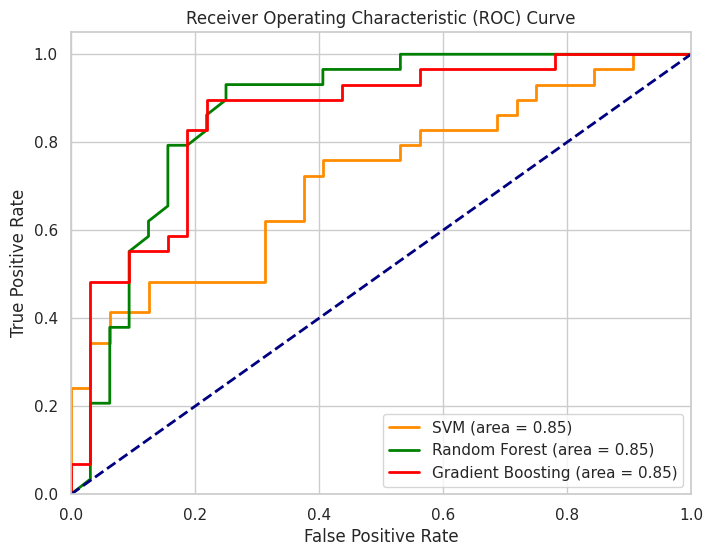

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class SVM.
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(x_train, y_train)
y_test_model_svm = model_svm.predict_proba(x_test)[:, 1]

# Get predicted probabilities for the positive class Random Forest.
y_test_model_rf = model_rf.predict_proba(x_test)[:, 1]

# Get predicted probabilities for the positive class Gradient Boosting.
y_test_model_gb = model_gb.predict_proba(x_test)[:, 1]

# Calculate ROC curve and ROC AUC SVM.
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_test_model_svm)
roc_auc = roc_auc_score(y_test, y_test_model_svm)

# Calculate ROC curve and ROC AUC Random Forest.
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_model_rf)
roc_auc = roc_auc_score(y_test, y_test_model_rf)

# Calculate ROC curve and ROC AUC Gradient Boosting.
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_test_model_gb)
roc_auc = roc_auc_score(y_test, y_test_model_gb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM (area = %0.2f)' % roc_auc)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label='Gradient Boosting (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Dalam kasus ini, nilai AUC ketiga model tersebut sama yaitu 0.85. Hal ini menunjukkan bahwa ketiga model tersebut memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.

Alasan pemilihan metric evaluation ROC AUC adalah sebab kasus heart diseases ini merupakan kasus klasifikasi.

#Kesimpulan dan Rekomendasi
Berdasarkan evaluasi, berikut adalah rekomendasi untuk implementasi model prediksi penyakit jantung:
1. Model Utama: Support Vector Machine (SVM).
  * Alasan: Kinerja yang andal dan stabil tanpa memerlukan tuning ekstensif, menjadikannya pilihan praktis untuk implementasi klinis.

2. Model Sekunder: Random Forest
  * Alasan: Akurasi tertinggi dengan kemampuan untuk menangani dataset besar, tetapi memerlukan tuning hyperparameter untuk hasil optimal. Cocok sebagai pendukung model SVM dalam pengambilan keputusan.

3. Tidak Direkomendasikan: Gradient Boosting
  * Alasan: Overfitting yang berkelanjutan membuatnya kurang dapat diandalkan untuk prediksi risiko penyakit jantung dalam konteks ini.

Langkah Selanjutnya
1. Penerapan Model: Mengimplementasikan model SVM di lingkungan klinis untuk membantu penyedia layanan kesehatan dalam membuat keputusan berdasarkan data.
2. Pemantauan dan Peningkatan Berkelanjutan: Secara teratur memperbarui dan memantau kinerja model, menggabungkan data baru untuk memastikan model tetap akurat dan andal.
3. Pelatihan dan Dukungan: Memberikan pelatihan kepada penyedia layanan kesehatan tentang cara menggunakan model secara efektif, memastikan mereka memahami kemampuan dan keterbatasannya.
4. Penelitian dan Pengembangan: Terus mengeksplorasi dan menguji model dan teknik baru untuk lebih meningkatkan akurasi dan keandalan prediksi penyakit jantung.

#Visualisasi (Dashboard)
https://lookerstudio.google.com/reporting/86e80163-63d4-4466-b368-31bcdf7c703f